In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

dir = "/content/drive/MyDrive/Tugas_Akhir/dataset"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Total Files : 1398


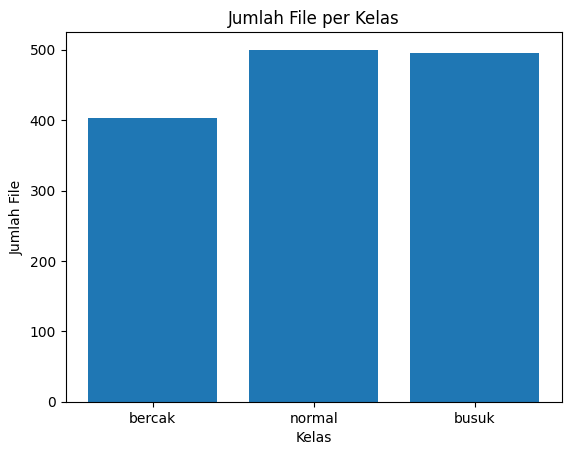

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt
import os

label = {}
total_files = 0
for i in os.listdir(dir):
    counting = len(os.listdir(os.path.join(dir, i)))
    label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

plt.bar(label.keys(), label.values());
plt.title("Jumlah File per Kelas");
plt.xlabel('Kelas');
plt.ylabel('Jumlah File');

In [ ]:
import tensorflow as tf

data = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3
)

In [ ]:
image_size = (200,200)
batch_size = 32
seed = 999

train_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='training',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

valid_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='validation',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

Found 980 images belonging to 3 classes.
Found 418 images belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255)
  ]
)



In [ ]:
augmentation = tf.keras.models.Sequential(data_augmentation)

# **Modeling**

Skenario 13 (optimizer adam, epoch : 5, learning rate = 0.0001)

In [ ]:
base_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(image_size[0], image_size[1], 3),
                                                        pooling='max')
base_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
densenet_model_14 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
densenet_model_14.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model DenseNet201
densenet_hist_14 = densenet_model_14.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 478s 15s/step - loss: 1.4553 - accuracy: 0.4031 - val_loss: 1.2231 - val_accuracy: 0.4665
Epoch 2/5
31/31 [==============================] - 275s 9s/step - loss: 1.0379 - accuracy: 0.5551 - val_loss: 0.9648 - val_accuracy: 0.6053
Epoch 3/5
31/31 [==============================] - 271s 9s/step - loss: 0.8376 - accuracy: 0.6459 - val_loss: 0.7477 - val_accuracy: 0.6770
Epoch 4/5
31/31 [==============================] - 275s 9s/step - loss: 0.7209 - accuracy: 0.7214 - val_loss: 0.6480 - val_accuracy: 0.7201
Epoch 5/5
31/31 [==============================] - 271s 9s/step - loss: 0.6361 - accuracy: 0.7296 - val_loss: 0.6262 - val_accuracy: 0.7297


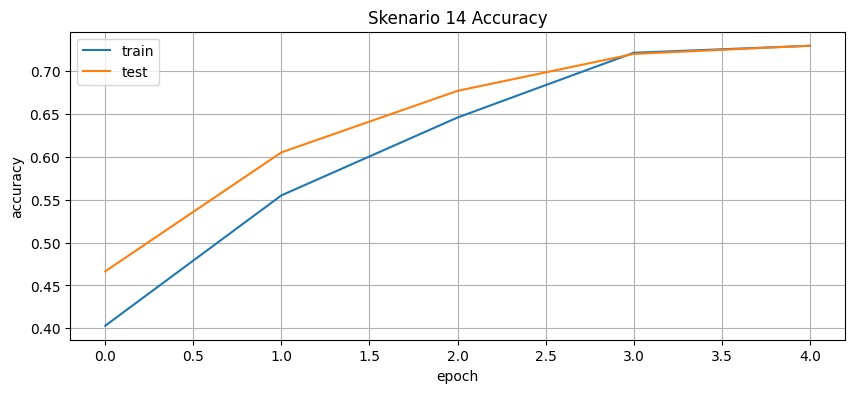

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(densenet_hist_14.history['accuracy'])
plt.plot(densenet_hist_14.history['val_accuracy'])
plt.title('Skenario 14 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 15 (optimizer : RMSprop, Epoch : 5, learning rate : 0.0001)

In [ ]:
model_skenario_15 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_15.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=['accuracy']
  )



In [ ]:
model_hist_15 = model_skenario_15.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 293s 9s/step - loss: 1.3659 - accuracy: 0.4765 - val_loss: 1.2157 - val_accuracy: 0.5335
Epoch 2/5
31/31 [==============================] - 269s 9s/step - loss: 1.0819 - accuracy: 0.5694 - val_loss: 0.9686 - val_accuracy: 0.6053
Epoch 3/5
31/31 [==============================] - 273s 9s/step - loss: 0.8693 - accuracy: 0.6582 - val_loss: 0.7938 - val_accuracy: 0.6818
Epoch 4/5
31/31 [==============================] - 273s 9s/step - loss: 0.7408 - accuracy: 0.7010 - val_loss: 0.6965 - val_accuracy: 0.7081
Epoch 5/5
31/31 [==============================] - 271s 9s/step - loss: 0.6499 - accuracy: 0.7357 - val_loss: 0.6388 - val_accuracy: 0.7321


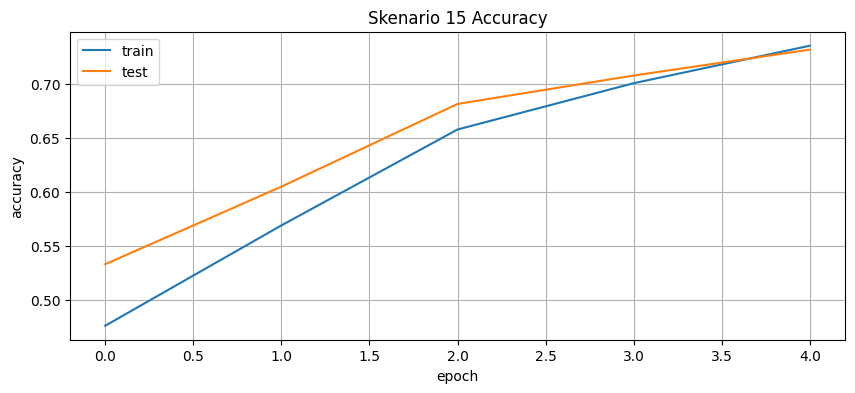

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_15.history['accuracy'])
plt.plot(model_hist_15.history['val_accuracy'])
plt.title('Skenario 15 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 2 (optimizer : RMSprop, Epoch : 5, learning rate 0.001)

In [ ]:
model_skenario_16 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_16.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    metrics=['accuracy']
  )



In [ ]:
model_hist_16 = model_skenario_16.fit(
    train_data,
    epochs=5,
    validation_data = valid_data
)

Epoch 1/5
31/31 [==============================] - 285s 9s/step - loss: 1.9172 - accuracy: 0.3755 - val_loss: 1.3035 - val_accuracy: 0.4976
Epoch 2/5
31/31 [==============================] - 269s 9s/step - loss: 1.3308 - accuracy: 0.4347 - val_loss: 1.1499 - val_accuracy: 0.5718
Epoch 3/5
31/31 [==============================] - 270s 9s/step - loss: 1.1942 - accuracy: 0.4837 - val_loss: 1.0325 - val_accuracy: 0.6148
Epoch 4/5
31/31 [==============================] - 267s 9s/step - loss: 1.1232 - accuracy: 0.5429 - val_loss: 0.9446 - val_accuracy: 0.6459
Epoch 5/5
31/31 [==============================] - 270s 9s/step - loss: 1.0083 - accuracy: 0.5694 - val_loss: 0.8800 - val_accuracy: 0.6675


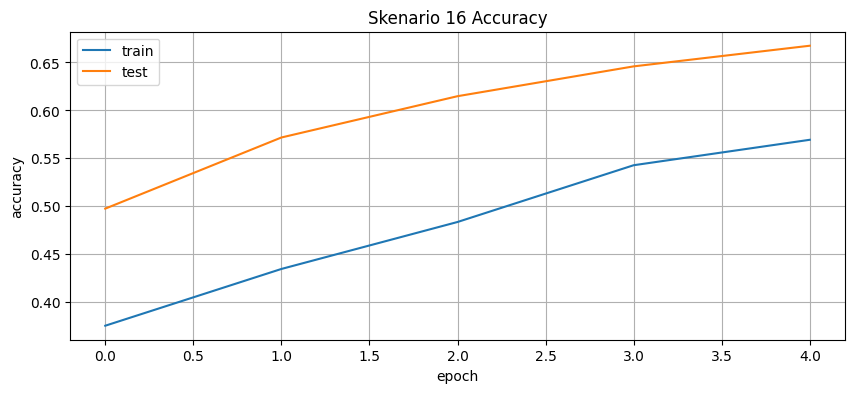

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_16.history['accuracy'])
plt.plot(model_hist_16.history['val_accuracy'])
plt.title('Skenario 16 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()